<a href="https://colab.research.google.com/github/sellauno/PVCK_1/blob/main/Modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pylab as plt 
import numpy as np

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


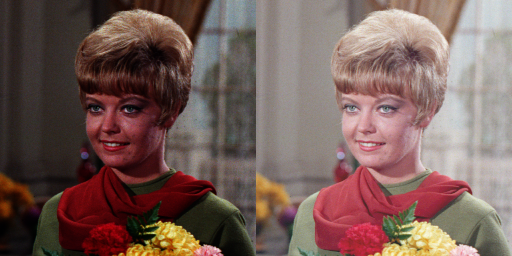

In [10]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')

invGamma = 1.0 / gamma
table = np.array([((i / 255.0) ** invGamma) * 255
    for i in np.arange(0, 256)]).astype("uint8")
adjusted = cv.LUT(original, table)
final_frame = cv.hconcat((original, adjusted))
cv2_imshow(final_frame)

Simulasi Image depth 
----------------------------------
Masukkan nilai bit depth [1-7]: 2


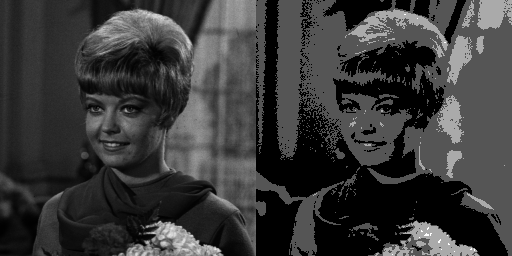

In [64]:
print('Simulasi Image depth ')
print('----------------------------------')
try:
  depth = int (input('Masukkan nilai bit depth [1-7]: '))
except ValueError:
  print('Error, not a number')
  
original = cv.imread('/content/drive/MyDrive/Images/female.tiff', cv.IMREAD_GRAYSCALE)
hasil = np.zeros(original.shape, original.dtype)
level = 255/(2** depth - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    hasil[y,x] = np.clip(round((original[y,x]/level))*level, 0, 255)

final_depth = cv.hconcat((original, hasil))
cv2_imshow(final_depth)


In [48]:
import glob
from math import log10, sqrt

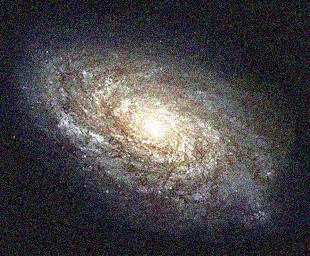

PSNR 5 value is 27.88569762636099 dB


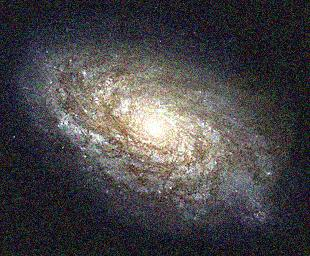

PSNR 30 value is 27.89458386408255 dB


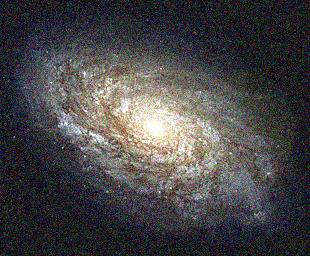

PSNR 60 value is 27.88140495827284 dB


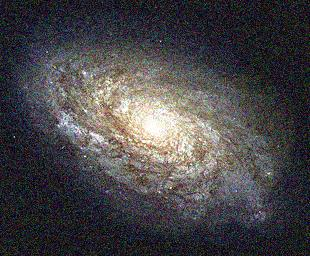

PSNR 80 value is 27.89996188227485 dB


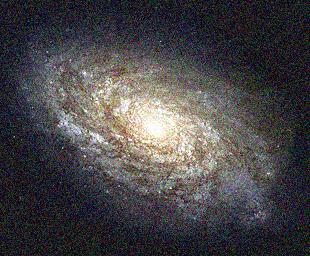

PSNR 100 value is 27.887378731679554 dB


In [59]:
original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

value = PSNR(original, cv_img[4])
cv2_imshow(cv_img[4])
print(f"PSNR 5 value is {value} dB")

value = PSNR(original, cv_img[29])
cv2_imshow(cv_img[29])
print(f"PSNR 30 value is {value} dB")

value = PSNR(original, cv_img[59])
cv2_imshow(cv_img[59])
print(f"PSNR 60 value is {value} dB")

value = PSNR(original, cv_img[79])
cv2_imshow(cv_img[79])
print(f"PSNR 80 value is {value} dB")

value = PSNR(original, cv_img[99])
cv2_imshow(cv_img[99])
print(f"PSNR 100 value is {value} dB")